In [67]:
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import utils

In [68]:
free_parameters = \
{'cov_para_1': 0.18167615397974568, 'cov_para_2': -0.6234475243883706, 'cov_para_3': 0.09890976245460237, 'cov_para_4': -0.05375370112406974, 'cov_para_5': 0.41403377651927864, 'cov_para_6': 0.42805600431695046, 'beta_1a': 12.229179161638806, 'beta_1b': 15.48700390805376, 'beta_2a': 5.398681025217028, 'beta_2b': 8.796495255971509, 'beta_3a': 11.908045326980305, 'beta_3b': 7.5447361781406315, 'beta_4a': 0.9544828845179285, 'beta_4b': 11.221488079336485, 'lambda_expon_1': 0.09737492935449865, 'lambda_expon_2': 0.0395616336913173, 'lambda_expon_3': 0.02344650715004244}

In [69]:
free_parameters = \
{'cov_para_1': 0.7892604627364547, 'cov_para_2': 0.6480906939385883, 'cov_para_3': -0.2785071869772713, 'cov_para_4': -0.0023746179166577175, 'cov_para_5': 0.3572304767776079, 'cov_para_6': 0.5506318568601846, 'beta_1a': 15.659723132595262, 'beta_1b': 12.330840765778913, 'beta_2a': 8.665597966608948, 'beta_2b': 6.9177030724959065, 'beta_3a': 15.665920211949498, 'beta_3b': 20.0, 'beta_4a': 8.585303272337093e-16, 'beta_4b': 10.140597100502342, 'lambda_expon_1': 0.05424476247453181, 'lambda_expon_2': 0.08728963882084122, 'lambda_expon_3': 0.04298357691262868}

In [87]:
free_parameters = \
{'cov_para_1': -0.7108294576406479, 'cov_para_2': 0.032454407215118386, 'cov_para_3': 0.14032620191574108, 'cov_para_4': -0.5873345732688904, 'cov_para_5': -0.17433049678802492, 'cov_para_6': -0.5307764142751694, 'beta_1a': 13.798109292984009, 'beta_1b': 9.883418083190918, 'beta_2a': 16.716409921646118, 'beta_2b': 3.1439927220344543, 'beta_3a': 4.512049555778503, 'beta_3b': 17.721967697143555, 'beta_4a': 0.07232991978526115, 'beta_4b': 12.989423274993896, 'lambda_expon_1': 0.07456688106060029, 'lambda_expon_2': 0.07274175101518632, 'lambda_expon_3': 0.08544138091802597}

In [88]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

lower_triangular_matrix = np.asarray([[diag_1,0,0,0],
                        [free_para1,diag_2,0,0],
                        [free_para2,free_para3,diag_3,0],
                        [free_para4,free_para5,free_para6,diag_4]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3]

new_dist = Multivariate.from_dict(copula_parameters)

In [89]:
cov_matrix

array([[ 1.        , -0.71082946,  0.03245441, -0.58733457],
       [-0.71082946,  1.        ,  0.07563091,  0.29487685],
       [ 0.03245441,  0.07563091,  1.        , -0.56876689],
       [-0.58733457,  0.29487685, -0.56876689,  1.        ]])

In [90]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

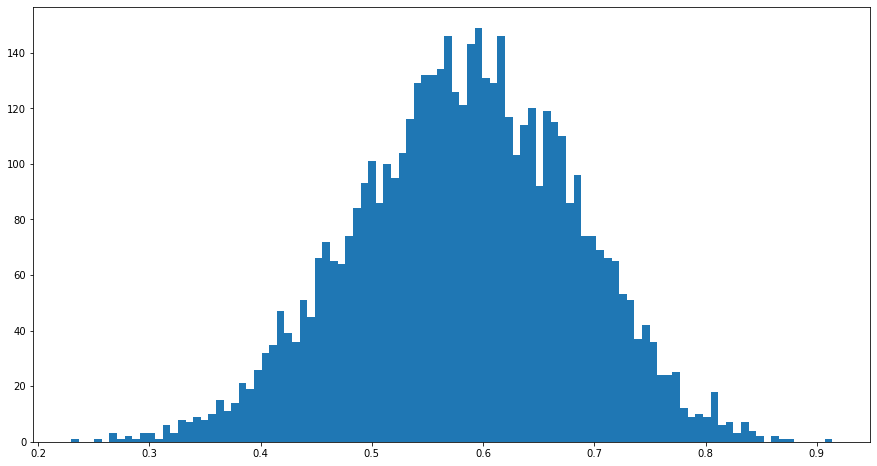

In [91]:
plt.rcParams["figure.figsize"] = (15,8)

plt.hist(samples[0],bins = 100)
plt.show()

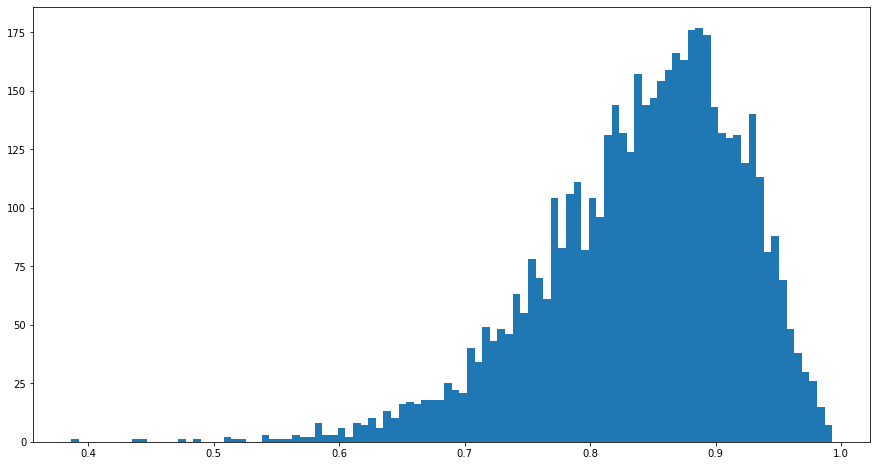

In [92]:
plt.hist(samples[1],bins = 100)
plt.show()

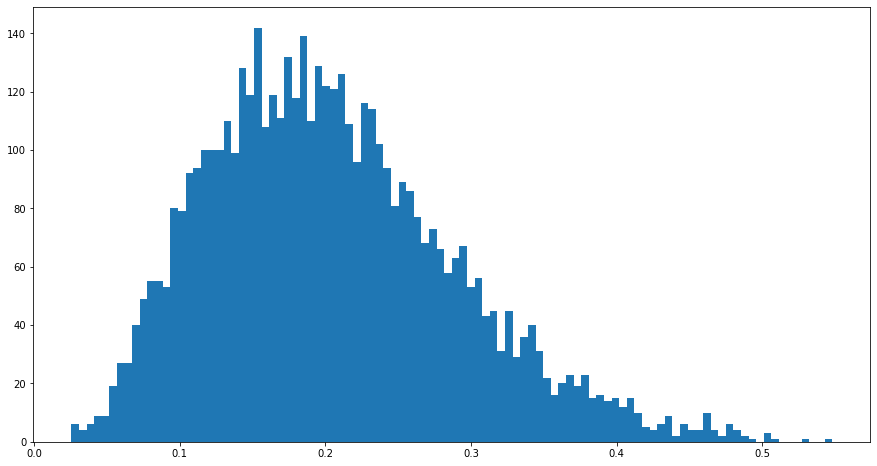

In [93]:
plt.hist(samples[2],bins = 100)
plt.show()

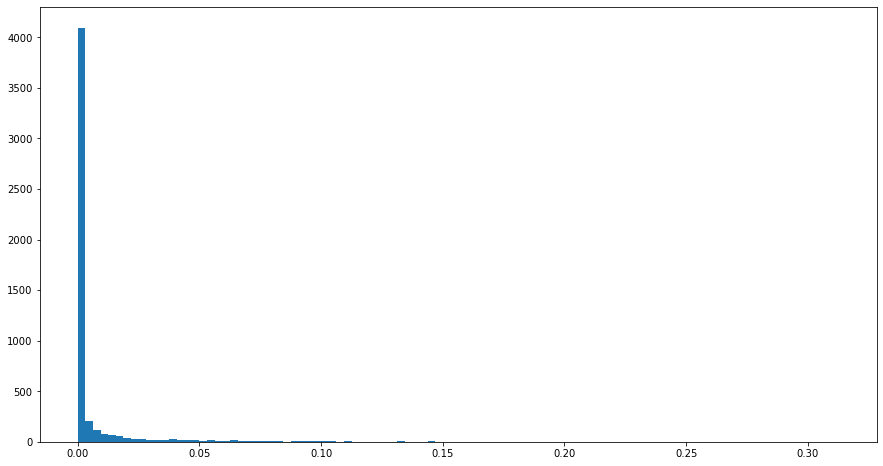

In [94]:
plt.hist(samples[3],bins = 100)
plt.show()

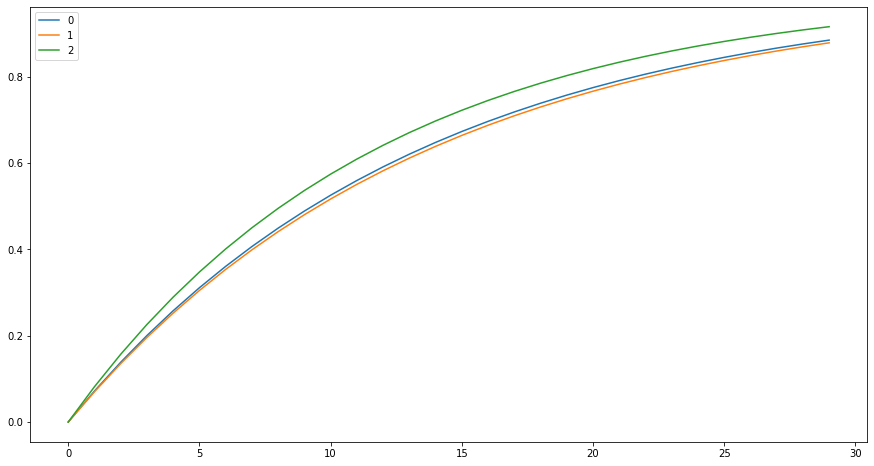

In [95]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3]


for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [96]:
import trading_vix
env = trading_vix.trading_vix()

In [97]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,15,15,148
1,43.720001,10.160000,16,16,149
2,44.320000,10.700000,17,17,150
3,44.799999,11.460000,1,18,151
4,43.279999,10.420000,2,19,152
...,...,...,...,...,...
995,8.190000,20.670000,3,7,80
996,8.080000,20.150000,4,8,81
997,7.710000,18.400000,5,9,82
998,7.710000,18.840000,6,10,83


In [98]:
env.reset(return_price=True)

(20.110001,
 array([[9.],
        [7.],
        [7.],
        [0.]]))

In [99]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3]

In [100]:
visualize_time_length = 200

price_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))

price,current_feature = env.reset(return_price=True)
price_history.append(price)


for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    #holding_position = expit(current_feature[-1,:][0])
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 4
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index+1] = 1
            #print('record sell action')

    action_history2[0,time_index+1] = action 
    

IndexError: single positional indexer is out-of-bounds

In [ ]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()